In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from decimal import Decimal
%matplotlib notebook

In [4]:
simple_regression = linear_model.LinearRegression()

In [5]:
train_data = pd.read_csv('kc_house_train_data.csv')

In [6]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
test_data = pd.read_csv('kc_house_test_data.csv')

In [8]:
test_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,114101516,20140528T000000,310000.0,3,1.0,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
1,9297300055,20150124T000000,650000.0,4,3.0,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
2,1202000200,20141103T000000,233000.0,3,2.0,1710,4697,1.5,0,0,...,6,1710,0,1941,0,98002,47.3048,-122.218,1030,4705
3,8562750320,20141110T000000,580500.0,3,2.5,2320,3980,2.0,0,0,...,8,2320,0,2003,0,98027,47.5391,-122.070,2580,3980
4,7589200193,20141110T000000,535000.0,3,1.0,1090,3000,1.5,0,0,...,8,1090,0,1929,0,98117,47.6889,-122.375,1570,5080


## sqft_living model

In [11]:
simple_regression.fit(pd.DataFrame(train_data['sqft_living']), train_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
simple_regression.coef_

array([281.95883963])

In [13]:
simple_regression.intercept_

-47116.0790728936

<IPython.core.display.Javascript object>


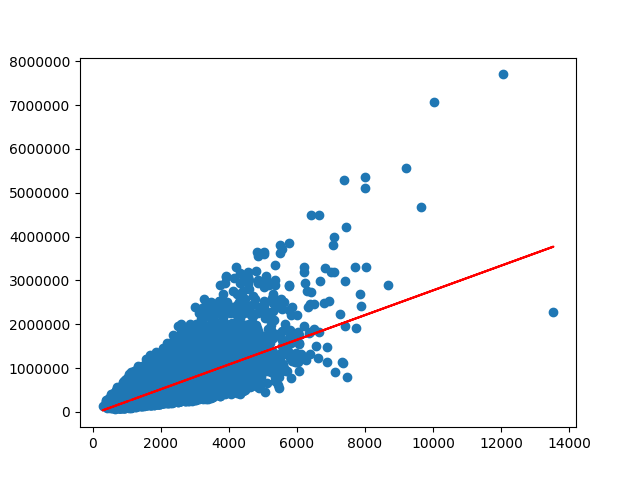

In [37]:
plt.scatter(train_data['sqft_living'], train_data['price'])
plt.plot(train_data['sqft_living'], simple_regression.predict(pd.DataFrame(train_data['sqft_living'])), color='red')

In [16]:
plt.plot?

In [13]:
simple_regression.predict(2650)

array([700074.84594751])

In [22]:
simple_regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [17]:
predictions = simple_regression.predict(pd.DataFrame(train_data['sqft_living']))

### train error

In [21]:
'%.2E' % Decimal(mean_squared_error(train_data['price'], predictions) * train_data.shape[0])

'1.20E+15'

### test error

In [31]:
test_sqrt_predictions = simple_regression.predict(pd.DataFrame(test_data['sqft_living']))

In [32]:
'%.2E' % Decimal(mean_squared_error(test_data['price'], test_sqrt_predictions) * test_data.shape[0])

'2.75E+14'

### get x by knowing y

In [33]:
# y = simple_regression.coef_ * x + simple_regression.intercept_
# x = (y - simple_regression.intercept_) / simple_regression.coef_

In [36]:
x = (800000 - simple_regression.intercept_) / simple_regression.coef_
print(x)

[3004.39624515]


## Bedrooms Model

In [23]:
bed_reg = linear_model.LinearRegression()

In [24]:
bed_reg.fit(pd.DataFrame(train_data['bedrooms']), train_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
predictions = bed_reg.predict(pd.DataFrame(train_data['bedrooms']))

### train error

In [27]:
'%.2E' % Decimal(mean_squared_error(train_data['price'], predictions) * train_data.shape[0])

'2.14E+15'

### test error

In [28]:
test_pre = bed_reg.predict(pd.DataFrame(test_data['bedrooms']))

In [29]:
'%.2E' % Decimal(mean_squared_error(test_data['price'], test_pre) * test_data.shape[0])

'4.93E+14'